<a href="https://colab.research.google.com/github/alwaysY0ung/hg-mldl/blob/main/ch05_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')
# 0 <- Red Wine
# 1 <- White Wine

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

# 앙상블

## 랜덤포레스트

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score = True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


### 훈련세트에 훈련

In [8]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


### OOB샘플, OOB점수

교차검증에서 얻은 점수와 매우 비슷하다.
OOB점수를 사용하면 교차검증을 대신할 수 있어서 결과적으로 훈련세트에 더 많은 샘플을 사용할 수 있다.

In [9]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


---
***하 여기부터 너무 빨라서 진짜 이해를 못함***

## 엑스트라 트리

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

et.fit(train_input, train_target)
print(et.feature_importances_)

0.9974503966084433 0.8887848893166506
[0.20183568 0.52242907 0.27573525]


## 그레이디언트 부스팅 gradient boosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

gb.fit(train_input, train_target)
print(gb.feature_importances_)

0.8881086892152563 0.8720430147331015
0.9464595437171814 0.8780082549788999
[0.15872278 0.68010884 0.16116839]


## 히스토그램 기반 부스팅

In [13]:
# 사이킷런 1.0 버전 아래에서는 다음 라인의 주석을 해제하고 실행하세요.
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

hgb.score(test_input, test_target)

0.9321723946453317 0.8801241948619236
[0.08876275 0.23438522 0.08027708]
[0.05969231 0.20238462 0.049     ]


0.8723076923076923

## XGBoost (scikit은 아니고, 오픈소스), pip install xgboost

In [14]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


## LightGBM (MS사에서 만든 오픈소스), pip install lightgbm

In [15]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


**5강 PPT 57페이지**

트리가 아닌 다른 모델을 앙상블할때 쓸 수 있는게 baggin이고
Gradient보단 덜 쓰지만 adaboost도 있다

실전에선 random forest와 gradient를 제일 많이 쓸 것임.

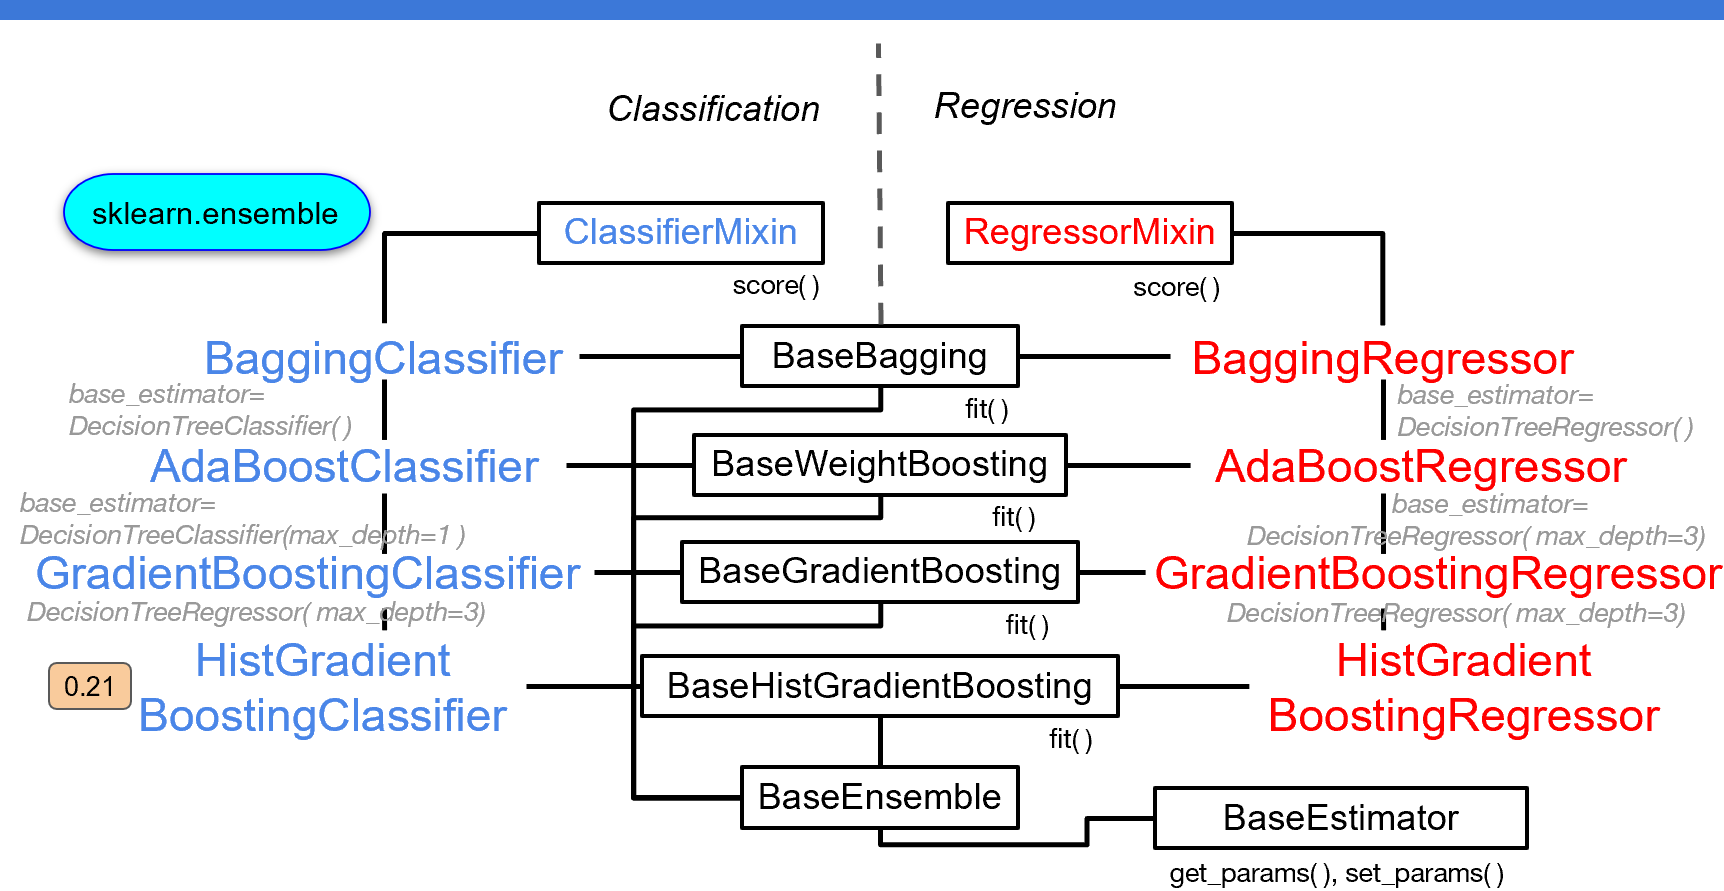